## Import Library 

In [2]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\prince Ajudiya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\prince Ajudiya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\prince Ajudiya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\prince Ajudiya\anaconda3\lib\site-packages\t

In [3]:
train_data_path = "data/train"
validation_data_path = "data/val"

Load a dataset from the google drive.In data set there are three floder one is train set and another is test set.In all three floder there four sub floder is there. 1.diseased cotton leaf 2.diseased cotton plant 3.fresh cotton leaf 4.fresh cotton plant

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
training_data = train_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary') 

Found 1951 images belonging to 4 classes.


In [6]:
for i in os.listdir("Data/train/"):
    print(str(len(os.listdir("Data/train/"+i))) +" "+ i +" images")

288 diseased cotton leaf images
815 diseased cotton plant images
427 fresh cotton leaf images
421 fresh cotton plant images


In [7]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


In [8]:
for i in os.listdir("Data/val/"):
    print(str(len(os.listdir("Data/val/"+i))) +" "+ i +" images")

55 diseased cotton leaf images
101 diseased cotton plant images
80 fresh cotton leaf images
88 fresh cotton plant images


In [9]:
model_path = 'test.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') 
])
 
 
model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)     

In [11]:
history = model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 


Epoch 1/100
61/61 [==============================] - 45s 742ms/step - loss: 1.2649 - accuracy: 0.4362 - val_loss: 1.5060 - val_accuracy: 0.4259

Epoch 00001: val_accuracy improved from -inf to 0.42593, saving model to test.h5
Epoch 2/100
61/61 [==============================] - 17s 277ms/step - loss: 1.0419 - accuracy: 0.5577 - val_loss: 0.6993 - val_accuracy: 0.5741

Epoch 00002: val_accuracy improved from 0.42593 to 0.57407, saving model to test.h5
Epoch 3/100
61/61 [==============================] - 18s 292ms/step - loss: 0.9279 - accuracy: 0.6202 - val_loss: 0.5580 - val_accuracy: 0.6481

Epoch 00003: val_accuracy improved from 0.57407 to 0.64815, saving model to test.h5
Epoch 4/100
61/61 [==============================] - 19s 314ms/step - loss: 0.8845 - accuracy: 0.6330 - val_loss: 1.0550 - val_accuracy: 0.6698

Epoch 00004: val_accuracy improved from 0.64815 to 0.66975, saving model to test.h5
Epoch 5/100
61/61 [==============================] - 20s 323ms/step - loss: 0.8546 - a

61/61 [==============================] - 31s 509ms/step - loss: 0.3785 - accuracy: 0.8519 - val_loss: 0.7248 - val_accuracy: 0.7716

Epoch 00039: val_accuracy did not improve from 0.88580
Epoch 40/100
61/61 [==============================] - 30s 488ms/step - loss: 0.3675 - accuracy: 0.8626 - val_loss: 1.0198 - val_accuracy: 0.8117

Epoch 00040: val_accuracy did not improve from 0.88580
Epoch 41/100
61/61 [==============================] - 32s 521ms/step - loss: 0.3515 - accuracy: 0.8601 - val_loss: 1.2700 - val_accuracy: 0.8302

Epoch 00041: val_accuracy did not improve from 0.88580
Epoch 42/100
61/61 [==============================] - 30s 494ms/step - loss: 0.3520 - accuracy: 0.8642 - val_loss: 0.1449 - val_accuracy: 0.7562

Epoch 00042: val_accuracy did not improve from 0.88580
Epoch 43/100
61/61 [==============================] - 30s 495ms/step - loss: 0.3476 - accuracy: 0.8672 - val_loss: 0.2123 - val_accuracy: 0.8889

Epoch 00043: val_accuracy improved from 0.88580 to 0.88889, sav

61/61 [==============================] - 33s 541ms/step - loss: 0.2646 - accuracy: 0.8970 - val_loss: 0.1036 - val_accuracy: 0.9012

Epoch 00079: val_accuracy did not improve from 0.97222
Epoch 80/100
61/61 [==============================] - 35s 568ms/step - loss: 0.2656 - accuracy: 0.9047 - val_loss: 0.7412 - val_accuracy: 0.9537

Epoch 00080: val_accuracy did not improve from 0.97222
Epoch 81/100
61/61 [==============================] - 35s 567ms/step - loss: 0.2776 - accuracy: 0.9026 - val_loss: 0.4926 - val_accuracy: 0.9012

Epoch 00081: val_accuracy did not improve from 0.97222
Epoch 82/100
61/61 [==============================] - 35s 568ms/step - loss: 0.2563 - accuracy: 0.8980 - val_loss: 0.0172 - val_accuracy: 0.9815

Epoch 00082: val_accuracy improved from 0.97222 to 0.98148, saving model to test.h5
Epoch 83/100
61/61 [==============================] - 32s 531ms/step - loss: 0.2312 - accuracy: 0.9083 - val_loss: 0.0081 - val_accuracy: 0.9198

Epoch 00083: val_accuracy did not 

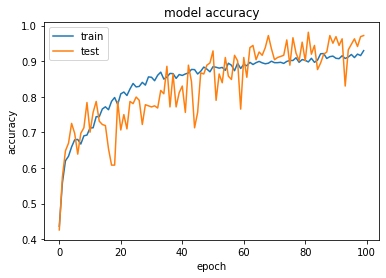

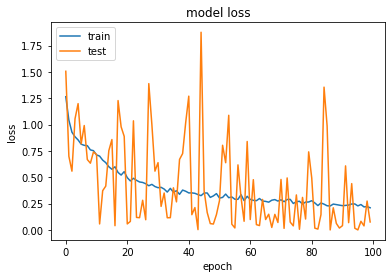

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model_file( 'test.h5' )
model = converter.convert()
file = open('model.tflite' , 'wb') 
file.write(model)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 14 variables.
INFO:tensorflow:Converted 14 variables to const ops.


8116316